In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('/home/ataur/Downloads/Dataset_Assignment Clustering/crime_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


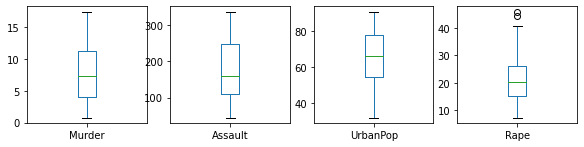

In [8]:
df.plot(kind='box', subplots=True, layout=(6,6), fontsize=10, figsize=(15,15));

In [11]:
iqr = df['Rape'].quantile(0.75) - df['Rape'].quantile(0.25)
iqr

11.099999999999996

In [12]:
lower_limit = df['Rape'].quantile(0.25) - 1.5*(iqr)
lower_limit

-1.574999999999994

In [13]:
upper_limit = df['Rape'].quantile(0.75) + 1.5*(iqr)
upper_limit

42.82499999999999

In [14]:
df['Rape'] = np.where(df['Rape'] > upper_limit, upper_limit, np.where(df['Rape'] < lower_limit, lower_limit, df['Rape']))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1eb4f00910>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1eb4ecc4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1eb4f005b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1eb4ecc370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1eb4eccf10>],
 'means': []}

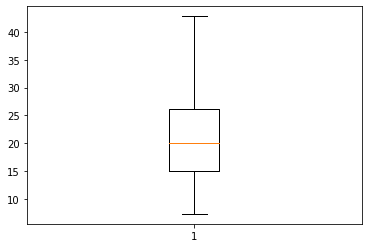

In [15]:
plt.boxplot(df['Rape'])

In [16]:
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [18]:
df_norm = norm_func(df.iloc[:,1:])

In [19]:
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.389444
std,0.262380,0.285403,0.245335,0.256732
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.218860
50%,0.388554,0.390411,0.576271,0.360310
75%,0.629518,0.698630,0.775424,0.531316
max,1.000000,1.000000,1.000000,1.000000


In [20]:
z = linkage(df_norm, method = "complete", metric = "euclidean")

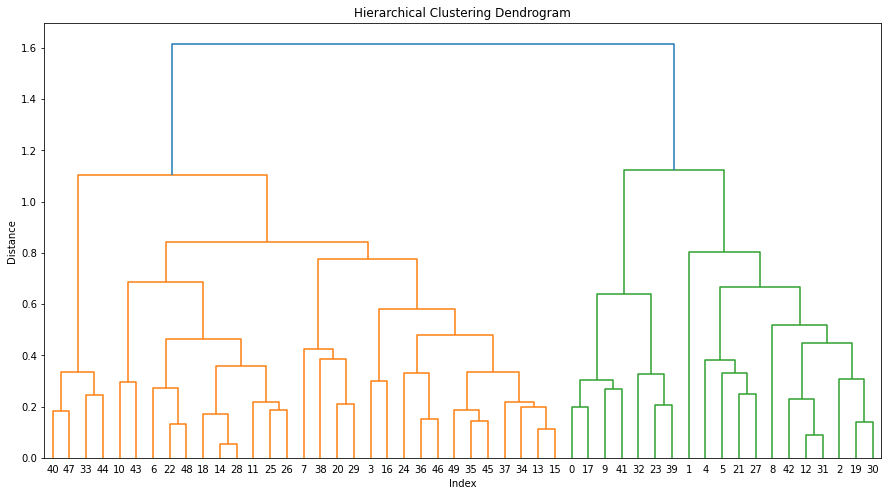

In [22]:
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dendrogram(z, leaf_rotation = 0, leaf_font_size = 10)
plt.show()

In [24]:
h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean").fit(df_norm) 
h_complete.labels_

array([2, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0])

In [25]:
cluster_labels = pd.Series(h_complete.labels_)

In [26]:
df['Clust'] = cluster_labels

In [32]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust
0,Alabama,13.2,236,58,21.200,2
1,Alaska,10.0,263,48,42.825,1
2,Arizona,8.1,294,80,31.000,1
3,Arkansas,8.8,190,50,19.500,0
4,California,9.0,276,91,40.600,1


In [36]:
df1 = df.iloc[:, [5,0,1,2,3,4]]

In [37]:
df1.head()

,Clust,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,2,Alabama,13.2,236,58,21.200
1,1,Alaska,10.0,263,48,42.825
2,1,Arizona,8.1,294,80,31.000
3,0,Arkansas,8.8,190,50,19.500
4,1,California,9.0,276,91,40.600


In [38]:
df1.iloc[:, 2:].groupby(df1.Clust).mean()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,5.003226,116.483871,63.838710,16.338710
1,10.966667,264.000000,76.500000,33.204167
2,14.671429,251.285714,54.285714,21.685714


In [39]:
df1.iloc[:, 2:].groupby(df1.Clust).std()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,2.383902,48.059596,14.210552,5.802395
1,2.100361,38.069315,11.090537,6.776571
2,1.693826,48.376007,8.538429,4.031306


In [43]:
df1.iloc[:, 2:].groupby(df1.Clust).median()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,4.9,113,66,16.3
1,11.2,259,80,32.0
2,14.4,249,58,22.2


In [47]:
df1.iloc[:, 2:].groupby(df1.Clust).var()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,5.682989,2309.724731,201.939785,33.667785
1,4.411515,1449.272727,123.000000,45.921913
2,2.869048,2340.238095,72.904762,16.251429


In [48]:
df1.iloc[:, 2:].groupby(df1.Clust).skew()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,0.239524,0.349572,-0.206460,0.432707
1,0.408602,-0.059958,-1.590857,0.207075
2,0.602851,0.678195,-0.070133,-0.209177


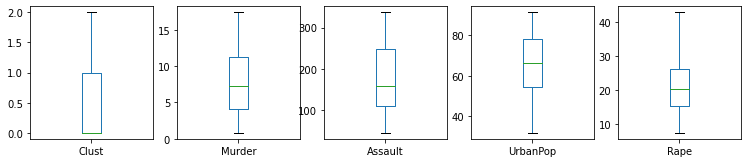

In [42]:
df1.plot(kind='box', subplots=True, layout=(7,7), fontsize=10, figsize=(18,20));